In [1]:
%pylab
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Using matplotlib backend: <object object at 0x00000228B73D6450>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


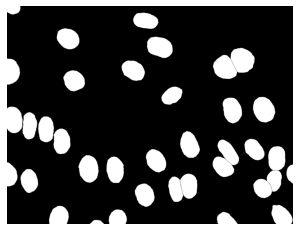

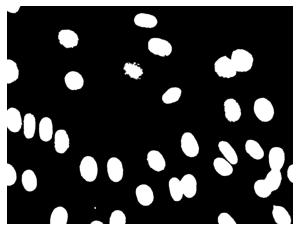

0.9827235249209292

In [41]:
#TRIAL VERSION, BACKGROUND DICE WORKS, FOREGROUND DICE IM NOT SURE
gt1 = plt.imread(r"data\Otsu_data\NIH3T3\gt\0.png")
plt.imshow(gt1, 'gray')
plt.axis("off")   # turns off axes
plt.axis("tight")  # gets rid of white border
plt.axis("image")  # square up the image instead of filling the "figure" space
plt.show()

pt1 = plt.imread(r"data\Otsu_data\NIH3T3\imageJ\dna-0.png")
plt.imshow(pt1, 'gray')
plt.axis("off")   # turns off axes
plt.axis("tight")  # gets rid of white border
plt.axis("image")  # square up the image instead of filling the "figure" space
plt.show()

tresholded = [pt1]
ground_truth = [gt1]

def b_dice(x): # POSITIVE PIXELS = BACKGROUNDx=picture number, same number for gt and post tresholding image):
    gt = ground_truth[x] #somehow define that we are taking gt picture x
    pt = tresholded[x] #somehow define that we are taking post tresholding picture x
    tp=0
    tn=0
    fp=0
    fn=0
    h = gt.shape[0]
    w = gt.shape[1]
    for x, y in np.ndindex((h,w)):
        if gt[x,y]==0:
            if pt[x,y]==0:
                tp+=1
            else:
                fn+=1
        else:
            if pt[x,y]==0:
                fp+=1
            else:
                tn+=1 #this part not rly needed tbh
    b_dsc= 2*tp/(2*tp+fn+fp)
    return b_dsc
    print(b_dsc)

def f_dice(x): # POSITIVE PIXELS = FOREGROUND x=picture number, same number for gt and post tresholding image):
    gt = ground_truth[x] #somehow define that we are taking gt picture x
    pt = tresholded[x] #somehow define that we are taking post tresholding picture x
    tp=0
    tn=0
    fp=0
    fn=0
    h = gt.shape[0]
    w = gt.shape[1]
    for x, y in np.ndindex((h,w)):
        if gt[x,y]!=0:
            if pt[x,y]!=0:
                tp+=1
            else:
                fn+=1
        else:
            if pt[x,y]!=0:
                fp+=1
            else:
                tn+=1 #this part not rly needed tbh
    f_dsc= 2*tp/(2*tp+fn+fp)
    return f_dsc
    print(f_dsc)
    
f_dice(0)
b_dice(0)


In [45]:
b_dice(0)

0.9827235249209292

In [46]:
f_dice(0)

0.9139577023521386

In [11]:
# lists of tresholded pictures and gt pictures!
# could we automatize this assigning process????
tresholded = [pic1, pic2, pic3, ...]
ground_truth = [pic1, pic2, pic3, ...]

NameError: name 'pic1' is not defined

In [12]:
def dice(x): #x=picture number, same number for gt and post tresholding image):
    gt = ground_truth[x] #somehow define that we are taking gt picture x
    pt = tresholded[x] #somehow define that we are taking post tresholding picture x
    tp=0
    tn=0
    fp=0
    fn=0
    for i in shape(gt): # shape(gt) should be equalt to shape(pt)
        if gt[i]==256:
            if pt[i]==256:
                tp+=1
            else:
                fn+=1
        else:
            if pt[i]==256:
                fp+=1
            else:
                tn+=1 #this part not rly needed tbh
    dsc= 2*tp/(2*tp+fn+fp)
    return dsc



    

In [13]:
# we can then make it run trough a whole dataset like
def dice_avg(y):
    sum = 0
    for x in range(0,len(tresholded)+1):
        dice(x)
        sum += dsc
    dsc_avg = sum/len(tresholded)
    return dsc_avg

    
    #whatever we want to do, we can store them in a vector and then make a graph or smth to visualize them especially for the report as time goes on, or calculate the average :)